# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [4]:
# Your code here.
student_data = pd.DataFrame({'X': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 
                             'Y': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

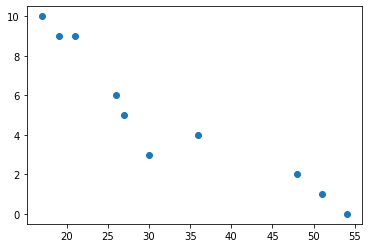

In [7]:
# Your code here.
plt.scatter(student_data['X'], student_data['Y'])
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 
# on this graph we see negative correlation - with increasing the value of age the value of 
# tardies is decreasing. so here is definetely a linear regression 

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [10]:
# Your response here.
#correlation:
correlation = student_data.corr()
correlation

,X,Y
X,1.000000,-0.939163
Y,-0.939163,1.000000


In [15]:
#covariance:
covariance = np.cov(student_data['X'], y = student_data['Y'] )
covariance

array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

In [ ]:
# Covariance indicates the direction of the linear relationship between variables while 
# correlation measures both the strength and direction of the linear relationship between 
# two variables.
# So in our case both correlation and covariance have '-' what means a relationship between 
# age and tardies, in which one age increases as the number of tardies decreases, and vice versa.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [57]:
# Your response here.
x = np.array(student_data['X']).reshape((-1, 1))
y = np.array(student_data['Y'])
model = LinearRegression().fit(x,y)
model

# I am using linear regression because it seems that our variables have linear relationship
# I am using Age as independent variable and Tardies as outcome variable. 

LinearRegression()

In [62]:
predictions = model.predict(x)
print(predictions)

[ 8.76085026  0.50494405  6.33264255  7.78956717  4.14725561  1.23340636
  8.27520872  6.57546332 -0.22351827  5.60418024]


Plot your regression model on your scatter plot.

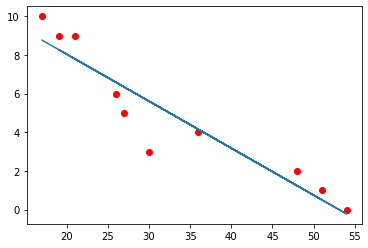

In [60]:
# Your code here.
plt.scatter(x, y, color = 'r')
plt.plot(x, predictions)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [64]:
# Your response here. 

'''

Looking to results of our model we can say that age is a good prediction of tardiness.
We have some standard errors but graph is linear decreasing and has a strong correlation
what gives us a confidence in our conclusions.

'''

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [66]:
# Import any libraries you may need & the data
vehicle = pd.read_csv('vehicles.csv')
vehicle

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [69]:
# Your response here. 
corr_year = vehicle[['Year', 'CO2 Emission Grams/Mile']].corr()
corr_year

,Year,CO2 Emission Grams/Mile
Year,1.0000,-0.2223
CO2 Emission Grams/Mile,-0.2223,1.0000


In [71]:
corr_cylinders = vehicle[['Cylinders', 'CO2 Emission Grams/Mile']].corr()
corr_year

,Cylinders,CO2 Emission Grams/Mile
Cylinders,1.000000,0.752393
CO2 Emission Grams/Mile,0.752393,1.000000


In [72]:
corr_fuel = vehicle[['Fuel Barrels/Year', 'CO2 Emission Grams/Mile']].corr()
corr_fuel

,Fuel Barrels/Year,CO2 Emission Grams/Mile
Fuel Barrels/Year,1.000000,0.986189
CO2 Emission Grams/Mile,0.986189,1.000000


In [73]:
corr_mpg = vehicle[['Combined MPG', 'CO2 Emission Grams/Mile']].corr()
corr_mpg

,Combined MPG,CO2 Emission Grams/Mile
Combined MPG,1.000000,-0.926229
CO2 Emission Grams/Mile,-0.926229,1.000000


In [74]:
corr_cost = vehicle[['Fuel Cost/Year', 'CO2 Emission Grams/Mile']].corr()
corr_cost

,Fuel Cost/Year,CO2 Emission Grams/Mile
Fuel Cost/Year,1.000000,0.930865
CO2 Emission Grams/Mile,0.930865,1.000000


In [ ]:
# it looks like the variable Fuel Barrels/Year has the strongest correlation for outcome
# variable CO2 Emission Grams/Mile. and the variable Year has weaker correlation from all 
# other variables, so its information would be less helpfull for us.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [77]:
# Your response here. 

X = vehicle[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
X = sm.add_constant(X)
y = vehicle['CO2 Emission Grams/Mile']
model = sm.OLS(y, X).fit()

# now i am using the model for multiple linear regression because we have multiple independent
# variables and we want to cheack the same outcome variable

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [81]:
# Your response here. 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Mon, 07 Feb 2022   Prob (F-statistic):               0.00
Time:                             00:33:57   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
'''

For each element Fuel Barrels/Year we have 19 of CO2 Emission Grams/Mile.
That variable has the ctrongest correlation and greatest coeficient. 
So the variable of Fuel Barrels/Year is the most important for us, because they are growing
together. 
Also from summary we can see information about other columns.
I am pretty confident about this conclusion beacuse of R-squared:0.981 what indicates that 98% 
of the variance of the dependent variable (CO2 Emission Grams/Mile) being studied is explained 
by the variance of the independent variable (Fuel Barrels/Year). 

'''

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [85]:
# Your code here.
partyhard = pd.DataFrame(({'Invited': [1, 3, 4, 6, 8, 9, 11, 14], 
                            'Attendants': [1, 2, 4, 4, 5, 7, 8, 13]}))
partyhard

,Invited,Attendants
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

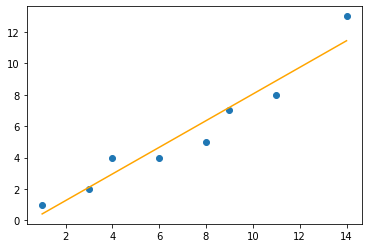

In [88]:
# Your code here.
x = partyhard['Invited']
y = partyhard['Attendants']
results = stats.linregress(x,y)
regression_line = results[1] + results[0]*x
plt.plot(x, regression_line, color = 'orange')
plt.scatter(x,y)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [91]:
# Your response here. 
print(regression_line)

0     0.409091
1     2.106061
2     2.954545
3     4.651515
4     6.348485
5     7.196970
6     8.893939
7    11.439394
Name: Invited, dtype: float64


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

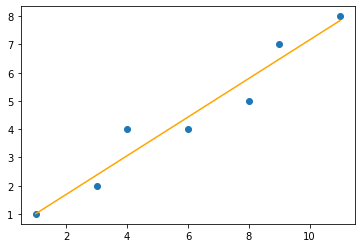

In [92]:
# Your response here. 
'''

Honestly, i dont see any problematic points. This dataset is pretty small and i cant call an
outlaier the spot with 3 points differences in regression line. This linear regression has a
point, but task itself not really - as more people invited as bigger propability that someone
will not show up, not depending from host theory.

'''
partyhard2 = pd.DataFrame(({'Invited': [1, 3, 4, 6, 8, 9, 11], 
                            'Attendants': [1, 2, 4, 4, 5, 7, 8]}))
x = partyhard2['Invited']
y = partyhard2['Attendants']
results = stats.linregress(x,y)
regression_line = results[1] + results[0]*x
plt.plot(x, regression_line, color = 'orange')
plt.scatter(x,y)
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
'''

There is still increasing linear regression in both cases, graph changed slightly what doesn't
change result much. I still think that the suspicion of host doesn't have a strong argument. 
Because also on the graph we can see, that sometimes more people invited doesn't mean more 
people didn't attend. And it even showes that one case what we excluded

'''